In [565]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from convertdate import islamic
from datetime import datetime
from hijri_converter import convert

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [568]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("Jadarat_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [571]:
df

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,مهندس تقنية معلومات,19/06/1444,['دراسة احتياجات العميل من الأجهزة الحاسوبية و...,[' متابعة وتقييم عملية جمع وتحليل المعطيات و...,مطعم الاوراق الخضر لتقديم الوجبات,15-1698448,خاص,صغيرة فئة ب,المطاعم مع الخدمة,NaN,الرياض,AR RIYADH...,"['Salary', '5500.0']",دوام كامل,0 / 1,20202026400353,0 Years,both
1466,سكرتير,19/06/1444,['دعم المدير أو الإدارة من خلال كتابة الوثائق ...,[' تدوين الملاحظات، التي يتم إملاؤها، بطريقة...,شركة ملتقى التجار لحاضنات و مسرعات الأعمال,9-2013930,خاص,صغيرة فئة ب,أنشطة حاضنات ومسرعات الأعمال,"['Skill data', 'فن التواصل', 'محترف', 'Languag...",مكة المكرمة,JEDDAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026399849,2 Years,both
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1468,مشغل آلة تشطيب رخام,18/06/1444,['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...,[' تسوية الرخام بواسطة أقراص الألماس الحديدي...,مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...,15-1971895,خاص,صغيرة فئة أ,NaN,"['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...",المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...",دوام كامل,0 / 3,20202026398972,0 Years,M


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [574]:
df.info

<bound method DataFrame.info of                       job_title    job_date  \
0                         محاسب  27/05/1444   
1                          بائع  27/05/1444   
2     أخصائي عمليات موارد بشرية  27/05/1444   
3               ميكانيكي سيارات  27/05/1444   
4                         محاسب  27/05/1444   
...                         ...         ...   
1465        مهندس تقنية معلومات  19/06/1444   
1466                     سكرتير  19/06/1444   
1467                      صيدلي  18/06/1444   
1468        مشغل آلة تشطيب رخام  18/06/1444   
1469                      صيدلي  18/06/1444   

                                               job_desc  \
0     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2     ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3     ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
...                                              

In [576]:
df.shape

(1470, 18)

In [578]:
df.describe()

,job_post_id
count,1.470000e+03
mean,2.020203e+13
std,5.863941e+04
min,2.020203e+13
25%,2.020203e+13
50%,2.020203e+13
75%,2.020203e+13
max,2.020203e+13


In [580]:
df.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

### Data Quality Checks




#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [582]:
#data from Jadarat

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [585]:
#Updated a year ago (2023)

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 



In [590]:
#All columns required

#### 5. Uniqueness: 


In [593]:
df.duplicated().sum().sum()

1

In [595]:
# go to delete duplicates columns

#### 6. Completeness: 


In [598]:
#Display number missing values per column
df.isna().sum()

job_title         0
job_date          0
job_desc          0
job_tasks         0
comp_name         0
comp_no           0
comp_type         0
comp_size        14
eco_activity     90
qualif          690
region            0
city              0
benefits          0
contract          0
positions         0
job_post_id       0
exper             0
gender            0
dtype: int64

In [600]:
count = (df == '-').sum().sum()

print(count)

0


In [602]:
count_ = (df == '/').sum().sum()

print(count_)

0


In [604]:
# go to clean them 

#### 7. Check Accuracy:



In [607]:
# check columns types 
df.dtypes

job_title       object
job_date        object
job_desc        object
job_tasks       object
comp_name       object
comp_no         object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions       object
job_post_id      int64
exper           object
gender          object
dtype: object

In [445]:
# go to clean them 

In [447]:
# check outliers 

In [709]:
df['Experience / Yare'].unique()

array([ 0,  2,  4, 10,  7, 12])

In [711]:
df['Salary / SAR'].unique()

array([ 5000.,  4000.,  4500.,  6000.,  8000., 10000.,  7200.,  7000.,
        3000.,  9000., 12000.,  5500.,  8400.,  3200.,  4170.,  3640.,
        5250.,  4400.,  4082.,  6150.,  6500., 15000., 16000.,  5700.,
        4782.,  4375.,  4434., 13889.,  4444.,  4800.,  5625.,  9200.,
        5600.,  8803.,  3500.,  5093.,  5800.,  5200.,  8500.,  3600.,
        7500.,  4408., 27000.,  4083.,  4600.,  8496.,  6250.,  8333.,
       32000., 12325.,  6583.,  5599.,  9500., 11000.,  4750.,  4320.,
        4630.,  5066.,  4687.,  4625., 10250.,  5040.,  3198.,  4050.,
        9600.,  4200., 35000., 13200.,  5271., 15532.,  4667.,  4300.,
        4001.,  3300.,  5483.,  7757., 18000.,  6999.,  9900.,  4900.,
       12400.,  9259., 14000.,  4100.,  5556.])

In [713]:
df['Salary / SAR'].max() 

35000.0

In [715]:
df['Salary / SAR'].min() 

3000.0

In [717]:
df['Number of vacancies'].unique()

array([ 1,  3,  2, 10,  4,  5,  9, 50,  6, 46,  8, 25, 20, 15,  7, 30])

In [719]:
df.columns

Index(['Job Title', 'Job Date', 'Job Description', 'Job Tasks', 'Company Name',
       'Company Number', 'Company Type', 'Company Size', 'Economic Activity',
       'Qualification', 'Region', 'City', 'Benefits', 'Contract',
       'Number of vacancies', 'Job ID', 'Experience / Yare', 'Gender',
       'Salary / SAR'],
      dtype='object')

<Axes: xlabel='Experience / Yare', ylabel='Salary / SAR'>

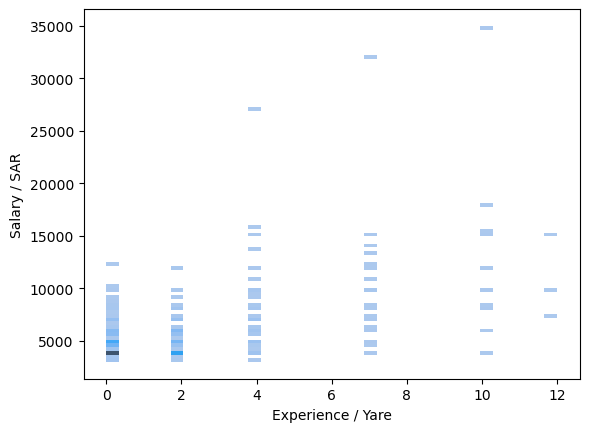

In [721]:
sns.histplot(data=df, 
            x="Experience / Yare",
             y = "Salary / SAR",
            )

<Axes: xlabel='Experience / Yare', ylabel='Salary / SAR'>

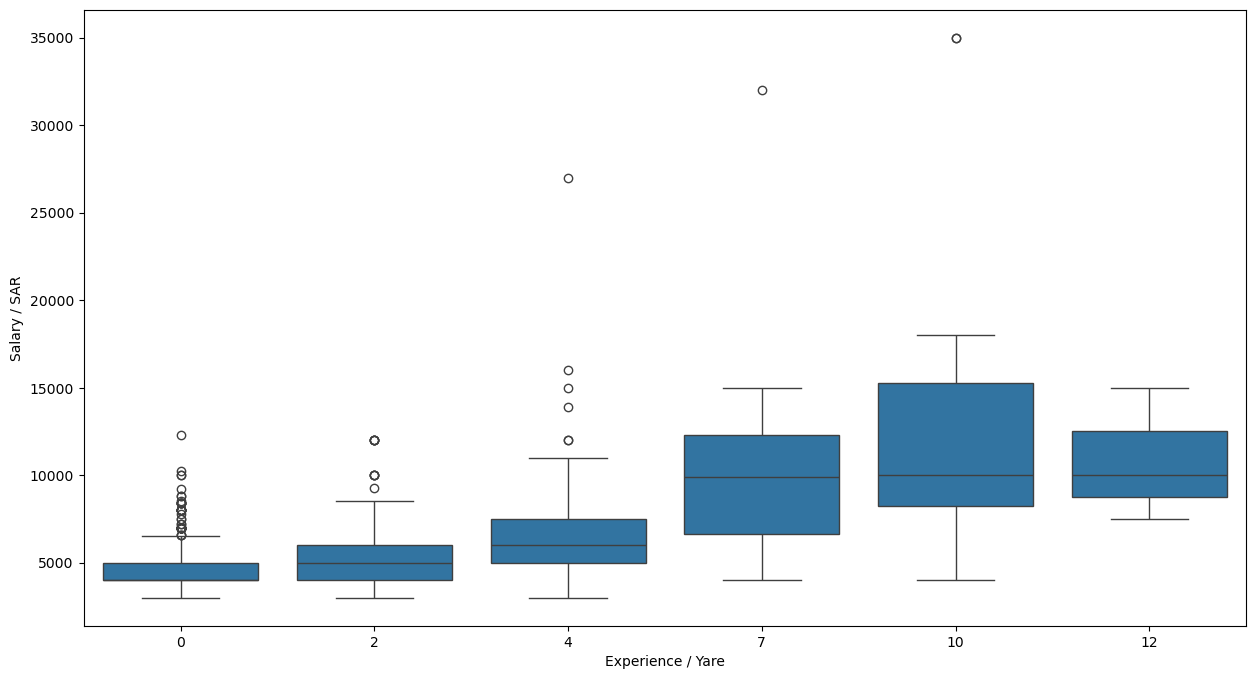

In [723]:
plt.figure(figsize=(15,8))
t10 = df.head(10)
sns.boxplot(
    df,
    x="Experience / Yare",
             y = "Salary / SAR",
    #z="Company Size"
)

## 2. Data Cleaning: 




### Handling missing values:

In [609]:
df.isna().sum()

job_title         0
job_date          0
job_desc          0
job_tasks         0
comp_name         0
comp_no           0
comp_type         0
comp_size        14
eco_activity     90
qualif          690
region            0
city              0
benefits          0
contract          0
positions         0
job_post_id       0
exper             0
gender            0
dtype: int64

In [611]:
df[df['qualif'].isna()]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
14,مصمم جرافيك,26/05/1444,['لديه الخبرة في اخراج العروض التقديمية الرس...,['لديه الخبرة في اخراج العروض التقديمية الرس...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026349504,4 Years,M
15,مدخل بيانات,26/05/1444,['التمكن من استخدام برامج مايكروسفت أوفيس'],['التمكن من استخدام برامج مايكروسفت أوفيس'],مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '3000.0']",دوام كامل,0 / 2,20202026349475,2 Years,M
16,مطور برامج,26/05/1444,[' تحليل وادارة تطبيقات باستخدام الأدوات البر...,[' تحليل وادارة تطبيقات باستخدام الأدوات ال...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '9000.0']",دوام كامل,0 / 1,20202026349439,4 Years,M
17,أخصائي إدارة اداء,26/05/1444,[' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...,[' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '12000.0']",دوام كامل,0 / 1,20202026349417,10 Years,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,أخصائي عمليات موارد بشرية,25/06/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركـة ذوق للتجارة,1-1526321,خاص,صغيرة فئة ب,البيع بالتجزئة للوكلاء بالعمولة بدون محلات,NaN,الرياض,AR RIYADH...,"['Salary', '5556.0']",دوام كامل,0 / 1,20202026403956,0 Years,F
1455,فني تصميم داخلي,24/06/1444,['تصميم أنظمة الألوان وطرز الأثاث، والمواد الم...,[' وضع التصاميم للمشروعات الداخلية، وإدارة ف...,شركة نمو للبحوث والدراسات (شركة شخص واحد),1-2166711,خاص,صغيرة فئة أ,مراكز البحوث والدراسات الاجتماعية,NaN,الرياض,AR RIYADH...,"['Salary', '5000.0', 'Benefits', 'عموله']",دوام كامل,0 / 1,20202026403328,2 Years,both
1460,كيميائي,23/06/1444,['دراسة خصائص المواد الكميائية للصناعات الكيمي...,[' إعداد برامج تشغيل الأجهزة والمعدات المخبر...,شركة نواف صالح البطي للتجارة,1-2604723,خاص,صغيرة فئة ب,تجارة الجملة والتجزئه في أنواع أخرى من المركبا...,NaN,الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026402275,0 Years,F
1464,بائع,21/06/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة النجمة الذهبية للتبريد والتكييف شركة شخص ...,8-1977608,خاص,صغيرة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AL HUFUF...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026401107,2 Years,F


In [613]:
#By referring to the Jadarat website, it is clear that entering Qualification is not mandatory.
df['qualif'] = df['qualif'].fillna(value = 'No requarment')

In [615]:
df[df['qualif'].isna()]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender


In [617]:
df[df['comp_size'].isna()]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1296,مدير إداري,25/06/1444,['المشاركة في تطوير الأهداف الرئيسية للشؤون ال...,[' المشاركة في تطوير الأهداف الرئيسية للشؤون...,مكتب تصميم المشاريع للاستشارات الهندسية,4-1990473,خاص,NaN,NaN,No requarment,المنطقة الشرقية,AD DAMMAM...,"['Salary', '12400.0']",دوام كامل,0 / 1,20202026404052,7 Years,M
1393,موظف صندوق محاسبة,01/07/1444,['عد المبالغ المالية المتوافرة في آلة تسجيل ال...,[' عدّ المبالغ المالية وتسجيلها في آلة تسجيل...,مغاسل نسيم الفل للملابس,15-1963098,خاص,NaN,NaN,No requarment,المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0']",دوام كامل,0 / 3,20202026407308,0 Years,both
1399,موظف صندوق محاسبة,29/06/1444,['عد المبالغ المالية المتوافرة في آلة تسجيل ال...,[' عدّ المبالغ المالية وتسجيلها في آلة تسجيل...,مغاسل نسيم الفل للملابس,15-1963098,خاص,NaN,NaN,No requarment,الرياض,AL KHUBAR...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026407112,0 Years,both
1401,وسيط عقاري,29/06/1444,['مساعدة البائعين وتقديم اقتراحات بأفضل طريقة ...,[' تقييم رغبات العملاء والميزانيات المحددة و...,مؤسسة فانس العقارية,1-2268591,خاص,NaN,NaN,"['Skill data', 'عقاري', 'مبتدئ', 'Language dat...",الرياض,RUMAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026407053,0 Years,F
1409,محامي,29/06/1444,['دراسة القضية وتجهيز ملفها وجمع البينات الخطي...,[' استقبال القضية وتحديد نوعها وتحليل عناصره...,شركة الخبراء المتحدون للمحاماة والاستشارات الق...,1-2334348,خاص,NaN,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 2,20202026406912,2 Years,both
1411,أخصائي قانوني,29/06/1444,['مساعدة العملاء والمنشآت في مختلف المسائل الق...,[' تأهيل الطلبات وتقييم الخيارات القانونية، ...,شركة الخبراء المتحدون للمحاماة والاستشارات الق...,1-2334348,خاص,NaN,NaN,"['Skill data', 'إدارة وتنظيم المستندات والوثائ...",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026406840,0 Years,both
1421,مدير مالي,29/06/1444,['المشاركة في تطوير الأهداف الرئيسية للإدارة ا...,[' المشاركة في تطوير الأهداف الرئيسية للإدار...,شركة إرفاء المحدودة (شركة شخص واحد),17-1989300,خاص,NaN,NaN,No requarment,حائل,ABA AL HI...,"['Salary', '14000.0']",دوام كامل,0 / 1,20202026406695,7 Years,both
1426,مصفف شعر,29/06/1444,['تقديم المشورة للعميل وتسريح الشعر وتصفيفه وت...,[' استقبال العميل وإجلاسه على كرسي القص ووض...,صالون تشرين ثاني للتزيين النسائي,1-2593881,خاص,NaN,NaN,"['Skill data', 'صف الشعر', 'متوسط']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026406598,4 Years,F
1432,موظف صندوق محاسبة,27/06/1444,['عد المبالغ المالية المتوافرة في آلة تسجيل ال...,[' عدّ المبالغ المالية وتسجيلها في آلة تسجيل...,مؤسسة التذوق الحلو لتقديم الوجبات,1-2559144,خاص,NaN,NaN,No requarment,الرياض,AL BIYAD...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026406120,0 Years,M
1436,أخصائي علاج طبيعي,26/06/1444,['دراسة وتحليل الحالة المرضية ووضع خطة وبرنامج...,[' دراسة وتحليل برنامج المعالجة الطبيعية الم...,مجمع ارجوان سامي بن نائف العتيبي الطبي,2-1949575,خاص,NaN,NaN,No requarment,الرياض,AL KHARJ...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026405893,0 Years,F


In [619]:
#Referring back to the specifications of the records in which the
#company size is empty, it was found that they are small institutions,
#so the value of the empty space was replaced with “مؤسسات صغيرة”
df['comp_size'] = df['comp_size'].fillna(value = 'مؤسسات صغيرة')

In [621]:
df

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,No requarment,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,مهندس تقنية معلومات,19/06/1444,['دراسة احتياجات العميل من الأجهزة الحاسوبية و...,[' متابعة وتقييم عملية جمع وتحليل المعطيات و...,مطعم الاوراق الخضر لتقديم الوجبات,15-1698448,خاص,صغيرة فئة ب,المطاعم مع الخدمة,No requarment,الرياض,AR RIYADH...,"['Salary', '5500.0']",دوام كامل,0 / 1,20202026400353,0 Years,both
1466,سكرتير,19/06/1444,['دعم المدير أو الإدارة من خلال كتابة الوثائق ...,[' تدوين الملاحظات، التي يتم إملاؤها، بطريقة...,شركة ملتقى التجار لحاضنات و مسرعات الأعمال,9-2013930,خاص,صغيرة فئة ب,أنشطة حاضنات ومسرعات الأعمال,"['Skill data', 'فن التواصل', 'محترف', 'Languag...",مكة المكرمة,JEDDAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026399849,2 Years,both
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1468,مشغل آلة تشطيب رخام,18/06/1444,['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...,[' تسوية الرخام بواسطة أقراص الألماس الحديدي...,مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...,15-1971895,خاص,صغيرة فئة أ,NaN,"['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...",المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...",دوام كامل,0 / 3,20202026398972,0 Years,M


In [623]:
df[df['comp_size'].isna()]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender


In [625]:
null_eco_activity = df[df['eco_activity'].isna()]

In [627]:
df['eco_activity'].unique()

array(['أنشطة وكالات السياحة والسفر',
       'تركيب انظمة التبريد وتكييف الهواء وصيانتها واصلاحها',
       'ترميمات المباني السكنية والغير سكنية', nan,
       'الإنشاءات العامة للمباني السكنية',
       'تشغيل المقاصف والكفتيريات على أساس إمتياز محدد ، يشمل ( المقاصف والكفتيريات في المصانع والمكاتب والمستشفيات والمدارس .. الخ )',
       'إعادة تأهيل وهيكلة العمليات الإدارية والمالية والتشغيلية للمنشآت',
       'البيع بالجملة للملابس الرياضية',
       'تقديم خدمات تسويقية نيابةً عن الغير', 'إدارة المشاريع الانشائية',
       'تركيب وصيانة أجهزة ومعدات الإنذار من الحريق',
       'البيع بالجملة للمواد الكيميائية',
       'أنشطة الاستشارات الهندسية والمعمارية',
       'خدمات جمع النفايات البلدية',
       'البيع بالتجزئة لمعدات محطات الوقود وقطع غيارها وتشمل (مضخات الوقود)',
       'إنشاء وإقامة محطات وأبراج الاتصالات السلكية واللاسلكية والرادار',
       'أنشطة المكاتب الرئيسة',
       'أنشطة الخدمات الإدارية المتكاملة للمكاتب',
       'مراكز ضيافة الأطفال الأهلية',
       'خلط وتعبئة العطور 

In [629]:
null_eco_activity.head(50)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
25,مدير عام,26/05/1444,['المشاركة في وضع الأهداف العامة والسياسات وال...,[' المشاركة في وضع الأهداف والسياسات والمباد...,ورشة اضواء المشاعل للحدادة والالمنيوم,10-2010602,خاص,صغيرة فئة أ,NaN,"['Skill data', 'حداد', 'متوسط', 'Language data...",المدينة المنورة,AL MADINA...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026348601,0 Years,M
40,مدير فرع,25/05/1444,['المشاركة في وضع وإعداد أهداف الفرع في ضوء تو...,[' المشاركة في وضع وإعداد الخطط والأهداف الخ...,شركة الزي للتجارة,9-2079452,خاص,متوسطة فئة أ,NaN,"['Language data', 'العربية', 'محترف', 'الانجلي...",المنطقة الشرقية,DHAHRAN...,"['Salary', '4500.0', 'Benefits', 'حسب سنوات ال...",دوام كامل,0 / 1,20202026347650,2 Years,both
42,موظف استقبال فندق,25/05/1444,['الإشراف على خدمات الضيوف في مكتب الاستقبال، ...,[' الحفاظ على قائمة الحجوزات، وتوفير السجلات...,فندق قصر الواحة الفندقية,1-2440535,خاص,صغيرة فئة ب,NaN,"['Skill data', 'الاستقبال الفندقي', 'محترف', '...",الرياض,AR RIYADH...,"['Salary', '4500.0', 'Benefits', 'تارقت شهري',...",دوام كامل,0 / 4,20202026347394,2 Years,both
47,بائع,25/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"['1- إستقبال الزبائن وعمل أوامر الطلبات ', '2-...",شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,NaN,"['Language data', 'العربية ', 'محترف']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 50,20202026346891,0 Years,M
48,بائع,25/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة أطياب غناتي التجارية,29-1959880,خاص,صغيرة فئة ب,NaN,['Language data'],الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 10,20202026346879,2 Years,F
49,أخصائي عمليات موارد بشرية,25/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركة الصخرة المشرفة والسارية الخضراء للاستشارا...,1-321449,خاص,متوسطة فئة ب,NaN,['Language data'],الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026346827,0 Years,F
50,أخصائي خدمة عملاء,25/05/1444,['وضع وتحديد مؤشرات ومعايير الأداء والجودة في ...,[' إجراء الدراسات والتحاليل المتخصصة بهدف وض...,شركة بروج للكابلات,1-2500658,خاص,صغيرة فئة أ,NaN,['Language data'],الرياض,AR RIYADH...,"['Salary', '6000.0']",دوام كامل,0 / 1,20202026346794,2 Years,both
51,بائع,25/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,['- تحقيق هدف المبيعات الشهري. ...,شركة المشروبات والاطعمة الغذائية,1-2432212,خاص,صغيرة فئة ب,NaN,"['Skill data', '-مهارة التواصل مع الآخرين.', '...",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 6,20202026346708,0 Years,both
52,أخصائي جودة,25/05/1444,['تصميم أدلة ونماذج إدارة الجودة، وتطبيق معايي...,[' دراسة وتحليل وإعداد وتصميم أدلة ونماذج إد...,شركة مصنع الجواد للبلاستيك والتغليف المرن,8-1971512,خاص,متوسطة فئة ج,NaN,"['Skill data', 'Language data']",المنطقة الشرقية,AL UYUN...,"['Salary', '4170.0', 'Benefits', 'بدل نقل 400']",دوام كامل,0 / 2,20202026346669,0 Years,both


In [631]:
null_eco_activity.tail(50)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
930,منسق منتجات,09/06/1444,['تخطيط طريقة عرض المنتجات في مكان العرض وتنسي...,[' تخطيط طريقة تنسيق المنتجات في مكان العرض،...,صيدليه السوسن الجديده لصاحبها سراج عمر سراج عابد,9-97451,خاص,صغيرة فئة ب,NaN,No requarment,مكة المكرمة,JEDDAH...,"['Salary', '4000.0', 'Benefits', '1000']",دوام كامل,0 / 2,20202026390782,0 Years,F
931,صيدلي,09/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,صيدليه السوسن الجديده لصاحبها سراج عمر سراج عابد,9-97451,خاص,صغيرة فئة ب,NaN,"['Skill data', 'التواصل', 'متوسط', 'الاتصال', ...",مكة المكرمة,JEDDAH...,"['Salary', '7500.0', 'Benefits', '1500']",دوام كامل,0 / 2,20202026390776,0 Years,F
947,أخصائي استشارات أعمال,08/06/1444,['الشؤون الصحية بوزارة الحرس الوطني تبحث عن اخ...,[' تقديم استشارات لتطوير الأهداف الرئيسيةفي...,برنامج مستشفى الملك فهدللحرس الوطني,EST-1237,شبه حكومية,كبيرة,NaN,"['Language data', 'اللغة الإنجليزية ', 'محترف']",الرياض,AR RIYADH...,"['Salary', '15532.0']",دوام كامل,0 / 1,20202026390144,10 Years,both
949,أخصائي بصريات,08/06/1444,['تجهيز النظارات الطبية بحسب نتائج الفحص أو وص...,[' اختيار إطار النظارة بالتنسيق مع صاحب العل...,شركة الدكتور حامد سليمان الاحمدي وشركاه المحدوده,10-1673172,خاص,كبيرة,NaN,"['Skill data', 'العمل ضمن فريق', 'محترف', 'موا...",المدينة المنورة,AL MADINA...,"['Salary', '4667.0', 'Benefits', 'بدل انتقال= ...",دوام كامل,0 / 5,20202026390106,0 Years,both
952,موظف استقبال فندق,08/06/1444,['الإشراف على خدمات الضيوف في مكتب الاستقبال، ...,[' الحفاظ على قائمة الحجوزات، وتوفير السجلات...,فندق ظاظا الفندقية,9-2126602,خاص,صغيرة فئة أ,NaN,No requarment,مكة المكرمة,ABU MARAG...,"['Salary', '4082.0']",دوام كامل,0 / 1,20202026379628,0 Years,M
961,أخصائي تسويق,07/06/1444,['تحديد الأهداف وتطوير السياسات التسويقية للسل...,[' تحديد الأهداف العامة والفرعية للتسويق وتط...,شركة رفا الطبية (شركة شخص واحد),1-362446,خاص,صغيرة فئة ب,NaN,"['Skill data', 'خبرة سابقة في التسويق الطبي', ...",الرياض,AR RIYADH...,"['Salary', '5500.0']",دوام كامل,0 / 1,20202026377722,2 Years,F
975,مدير إداري,02/06/1444,['تطوير الأهداف الرئيسية للشؤون الإدارية، والإ...,['تطوير الأهداف الرئيسية للشؤون الإدارية، وتطو...,شركة الرعاية الموثوقة الطبية شركة شخص واحد,1-2466520,خاص,صغيرة فئة ب,NaN,"['Skill data', 'Multitask Performance ', 'محتر...",الرياض,AR RIYADH...,"['Salary', '12000.0', 'Benefits', 'تعتمد على ا...",دوام كامل,0 / 1,20202026368280,4 Years,both
1046,كاتب استعلامات مركز خدمة عملاء,04/06/1444,['تقديم المشورة والمعلومات الأساسية للعملاء، و...,[' الرد على الأسئلة والاستعلامات الأساسية لل...,شركة الخبير التربوي للتدريب,10-1967416,خاص,صغيرة فئة ب,NaN,"['Skill data', 'شخصية قوية وجذابة', 'محترف', '...",المدينة المنورة,AL MADINA...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026367635,2 Years,F
1101,محاسب,09/06/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة ساري الليل للمقاولات العامة,19-1951616,خاص,صغيرة فئة ب,NaN,No requarment,المنطقة الشرقية,HAFAR AL ...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026391571,0 Years,F
1102,محاسب,09/06/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة أطياف للخدمات المساندة,1-1948186,خاص,كبيرة,NaN,No requarment,الرياض,AR RIYADH...,"['Salary', '6000.0']",دوام كامل,0 / 1,20202026391554,0 Years,F


In [633]:
#handle null values with company name
df['eco_activity'] = df.apply(lambda x: x['comp_name'] if pd.isna(x['eco_activity']) else x['eco_activity'], axis=1)

In [635]:
df[df['eco_activity'].isna()]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender


In [637]:
df

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,No requarment,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,مؤسسة لمكو لغيار الزيوت,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,مهندس تقنية معلومات,19/06/1444,['دراسة احتياجات العميل من الأجهزة الحاسوبية و...,[' متابعة وتقييم عملية جمع وتحليل المعطيات و...,مطعم الاوراق الخضر لتقديم الوجبات,15-1698448,خاص,صغيرة فئة ب,المطاعم مع الخدمة,No requarment,الرياض,AR RIYADH...,"['Salary', '5500.0']",دوام كامل,0 / 1,20202026400353,0 Years,both
1466,سكرتير,19/06/1444,['دعم المدير أو الإدارة من خلال كتابة الوثائق ...,[' تدوين الملاحظات، التي يتم إملاؤها، بطريقة...,شركة ملتقى التجار لحاضنات و مسرعات الأعمال,9-2013930,خاص,صغيرة فئة ب,أنشطة حاضنات ومسرعات الأعمال,"['Skill data', 'فن التواصل', 'محترف', 'Languag...",مكة المكرمة,JEDDAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026399849,2 Years,both
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,شركة تقنية الدواجن والألبان للتجارة,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1468,مشغل آلة تشطيب رخام,18/06/1444,['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...,[' تسوية الرخام بواسطة أقراص الألماس الحديدي...,مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...,15-1971895,خاص,صغيرة فئة أ,مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...,"['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...",المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...",دوام كامل,0 / 3,20202026398972,0 Years,M


In [639]:
df.isna().sum()

job_title       0
job_date        0
job_desc        0
job_tasks       0
comp_name       0
comp_no         0
comp_type       0
comp_size       0
eco_activity    0
qualif          0
region          0
city            0
benefits        0
contract        0
positions       0
job_post_id     0
exper           0
gender          0
dtype: int64

In [641]:
df.duplicated().sum().sum()

1

In [643]:
df[df.duplicated()]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1469,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,شركة تقنية الدواجن والألبان للتجارة,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both


In [645]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [648]:
df.dtypes

job_title       object
job_date        object
job_desc        object
job_tasks       object
comp_name       object
comp_no         object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions       object
job_post_id      int64
exper           object
gender          object
dtype: object

In [650]:
df['exper'] = df['exper'].map(lambda x: x.split('Y')[0])
df['exper'] = df['exper'].astype(int)

In [652]:
df['positions'] = df['positions'].map(lambda x: x.split('/')[1])


In [654]:
df['positions'] = df['positions'].astype(int)

In [656]:
df.dtypes

job_title       object
job_date        object
job_desc        object
job_tasks       object
comp_name       object
comp_no         object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions        int32
job_post_id      int64
exper            int32
gender          object
dtype: object

In [658]:
df['benefits']

0                                    ['Salary', '5000.0']
1                                    ['Salary', '5000.0']
2                                    ['Salary', '4000.0']
3                                    ['Salary', '5000.0']
4                                    ['Salary', '5000.0']
                              ...                        
1465                                 ['Salary', '5500.0']
1466                                 ['Salary', '4000.0']
1467                                 ['Salary', '7000.0']
1468    ['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...
1469                                 ['Salary', '7000.0']
Name: benefits, Length: 1470, dtype: object

In [660]:
df['Salary'] = df['benefits'].map(lambda x: x.split(',')[1])

In [662]:
df['Salary'] = df['Salary'].map(lambda x: x.split(']')[0])


In [664]:
df['Salary']

0        '5000.0'
1        '5000.0'
2        '4000.0'
3        '5000.0'
4        '5000.0'
          ...    
1465     '5500.0'
1466     '4000.0'
1467     '7000.0'
1468     '4000.0'
1469     '7000.0'
Name: Salary, Length: 1470, dtype: object

In [667]:
df['Salary'] = df['Salary'].str.replace("'", "", regex=False) 
df['Salary'] = df['Salary'].str.strip()  
df['Salary'] = df['Salary'].astype(float)

In [669]:
df['Salary'] 

0       5000.0
1       5000.0
2       4000.0
3       5000.0
4       5000.0
         ...  
1465    5500.0
1466    4000.0
1467    7000.0
1468    4000.0
1469    7000.0
Name: Salary, Length: 1470, dtype: float64

In [671]:
df['gender'] = df['gender'].str.replace("M", "Male", regex=False)

In [673]:
df['gender'] = df['gender'].str.replace("F", "Female", regex=False)

In [675]:
df['gender'] = df['gender'].str.replace("both", "Both", regex=False)

In [677]:
df.head(50)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender,Salary
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,1,20202026350419,0,Both,5000.0
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,No requarment,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,3,20202026350389,0,Both,5000.0
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,2,20202026350347,2,Both,4000.0
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,مؤسسة لمكو لغيار الزيوت,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,10,20202026350219,0,Male,5000.0
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,1,20202026350043,0,Both,5000.0
5,مراقب كاميرات أمنية,27/05/1444,['الإشراف على عمليات كاميرات المراقبة الأمنية،...,[' الإشراف على عمليات كاميرات المراقبة، والت...,مطاعم تراث الدمشقية للوجبات السريعة,1-1527188,خاص,صغيرة فئة ب,تشغيل المقاصف والكفتيريات على أساس إمتياز محدد...,"['Skill data', 'اجادة الحاسب والتقنية ', 'متوس...",الرياض,AR RIYADH...,"['Salary', '4500.0']",عمل عن بعد,1,20202026350031,0,Both,4500.0
6,سكرتير تنفيذي,27/05/1444,['تنظيم المواعيد وإعداد المذكرات وإجراء المراس...,[' تنظيم مواعيد المدير/الرئيس وتذكيره بها، و...,شركة بيانات و دعم القرار للاستشارات في مجال ال...,9-2027654,خاص,صغيرة فئة أ,إعادة تأهيل وهيكلة العمليات الإدارية والمالية ...,"['Language data', 'لغة انجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '6000.0']",دوام كامل,2,20202026349999,4,Female,6000.0
7,مدير مكتب,27/05/1444,['الإشراف المباشرعلى أنشطة إدارة وتخطيط وتنظيم...,[' إدارة وتوجيه عمليات وإجراءات تنسيق اجتماع...,شركة بيانات و دعم القرار للاستشارات في مجال ال...,9-2027654,خاص,صغيرة فئة أ,إعادة تأهيل وهيكلة العمليات الإدارية والمالية ...,"['Language data', 'لغة انجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '8000.0']",دوام كامل,1,20202026349997,4,Female,8000.0
8,أخصائي إدارة مشاريع,27/05/1444,['تحليل عناصر وفعاليات المشروع ووضع الخطط والب...,[' تحليل عناصر وفعاليات المشروع وارتباطها وت...,شركة بيانات و دعم القرار للاستشارات في مجال ال...,9-2027654,خاص,صغيرة فئة أ,إعادة تأهيل وهيكلة العمليات الإدارية والمالية ...,"['Language data', 'لغة انجليزية', 'محترف', 'Pr...",الرياض,AR RIYADH...,"['Salary', '10000.0']",دوام كامل,3,20202026349992,2,Female,10000.0
9,مصمم جرافيك,26/05/1444,['تطوير الأفكار الإبداعية والمفاهيم لتوصيل الر...,[' التنسيق مع مالك التصميم (عملاء محليون أو ...,شركة بيانات و دعم القرار للاستشارات في مجال ال...,9-2027654,خاص,صغيرة فئة أ,إعادة تأهيل وهيكلة العمليات الإدارية والمالية ...,"['Language data', 'لغة انجليزية', 'متوسط']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,2,20202026349583,4,Female,5000.0


In [679]:
df.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender', 'Salary'],
      dtype='object')

In [681]:
df.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender', 'Salary'],
      dtype='object')

In [683]:
new_column_names = {
    'job_title': 'Job Title',
    'job_date': 'Job Date',
    'job_desc': 'Job Description',
    'job_tasks': 'Job Tasks',
    'comp_name': 'Company Name',
    'comp_no' : 'Company Number',
    'comp_type': 'Company Type',
    'comp_size': 'Company Size',
    'eco_activity': 'Economic Activity',
    'qualif': 'Qualification',
    'region': 'Region',
    'city': 'City',
    'benefits': 'Benefits',
    'contract': 'Contract',
    'positions':'Number of vacancies',
    'job_post_id' : 'Job ID',
    'exper': 'Experience / Yare',
    'gender': 'Gender',
    'Salary': 'Salary / SAR'
}
df.rename(columns=new_column_names, inplace=True)

In [685]:
df

,Job Title,Job Date,Job Description,Job Tasks,Company Name,Company Number,Company Type,Company Size,Economic Activity,Qualification,Region,City,Benefits,Contract,Number of vacancies,Job ID,Experience / Yare,Gender,Salary / SAR
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,1,20202026350419,0,Both,5000.0
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,No requarment,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,3,20202026350389,0,Both,5000.0
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,2,20202026350347,2,Both,4000.0
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,مؤسسة لمكو لغيار الزيوت,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,10,20202026350219,0,Male,5000.0
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,1,20202026350043,0,Both,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,مهندس تقنية معلومات,19/06/1444,['دراسة احتياجات العميل من الأجهزة الحاسوبية و...,[' متابعة وتقييم عملية جمع وتحليل المعطيات و...,مطعم الاوراق الخضر لتقديم الوجبات,15-1698448,خاص,صغيرة فئة ب,المطاعم مع الخدمة,No requarment,الرياض,AR RIYADH...,"['Salary', '5500.0']",دوام كامل,1,20202026400353,0,Both,5500.0
1466,سكرتير,19/06/1444,['دعم المدير أو الإدارة من خلال كتابة الوثائق ...,[' تدوين الملاحظات، التي يتم إملاؤها، بطريقة...,شركة ملتقى التجار لحاضنات و مسرعات الأعمال,9-2013930,خاص,صغيرة فئة ب,أنشطة حاضنات ومسرعات الأعمال,"['Skill data', 'فن التواصل', 'محترف', 'Languag...",مكة المكرمة,JEDDAH...,"['Salary', '4000.0']",دوام كامل,1,20202026399849,2,Both,4000.0
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,شركة تقنية الدواجن والألبان للتجارة,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,1,20202026399061,0,Both,7000.0
1468,مشغل آلة تشطيب رخام,18/06/1444,['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...,[' تسوية الرخام بواسطة أقراص الألماس الحديدي...,مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...,15-1971895,خاص,صغيرة فئة أ,مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...,"['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...",المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...",دوام كامل,3,20202026398972,0,Male,4000.0


In [687]:
df.dtypes

Job Title               object
Job Date                object
Job Description         object
Job Tasks               object
Company Name            object
Company Number          object
Company Type            object
Company Size            object
Economic Activity       object
Qualification           object
Region                  object
City                    object
Benefits                object
Contract                object
Number of vacancies      int32
Job ID                   int64
Experience / Yare        int32
Gender                  object
Salary / SAR           float64
dtype: object

In [689]:
df['Experience / Yare'].unique()

array([ 0,  2,  4, 10,  7, 12])

In [691]:
df['Salary / SAR'].unique()

array([ 5000.,  4000.,  4500.,  6000.,  8000., 10000.,  7200.,  7000.,
        3000.,  9000., 12000.,  5500.,  8400.,  3200.,  4170.,  3640.,
        5250.,  4400.,  4082.,  6150.,  6500., 15000., 16000.,  5700.,
        4782.,  4375.,  4434., 13889.,  4444.,  4800.,  5625.,  9200.,
        5600.,  8803.,  3500.,  5093.,  5800.,  5200.,  8500.,  3600.,
        7500.,  4408., 27000.,  4083.,  4600.,  8496.,  6250.,  8333.,
       32000., 12325.,  6583.,  5599.,  9500., 11000.,  4750.,  4320.,
        4630.,  5066.,  4687.,  4625., 10250.,  5040.,  3198.,  4050.,
        9600.,  4200., 35000., 13200.,  5271., 15532.,  4667.,  4300.,
        4001.,  3300.,  5483.,  7757., 18000.,  6999.,  9900.,  4900.,
       12400.,  9259., 14000.,  4100.,  5556.])

In [693]:
df['Salary / SAR'].max() 

35000.0

In [695]:
df['Salary / SAR'].min() 

3000.0

In [697]:
df['Number of vacancies'].unique()

array([ 1,  3,  2, 10,  4,  5,  9, 50,  6, 46,  8, 25, 20, 15,  7, 30])

In [699]:
def convert_to_gregorian(date_str):
    try:
        day, month, year = map(int, date_str.split('/'))
        gregorian_date = convert.Hijri(year, month, day).to_gregorian()
        return datetime(gregorian_date.year, gregorian_date.month, gregorian_date.day)
    except ValueError:
       
        return None

df['Job Date'] = df['Job Date'].apply(convert_to_gregorian)



In [701]:
df['Job Date'] = pd.to_datetime(df['Job Date'], format='%d-%m-%Y')


In [703]:
df.dtypes

Job Title                      object
Job Date               datetime64[ns]
Job Description                object
Job Tasks                      object
Company Name                   object
Company Number                 object
Company Type                   object
Company Size                   object
Economic Activity              object
Qualification                  object
Region                         object
City                           object
Benefits                       object
Contract                       object
Number of vacancies             int32
Job ID                          int64
Experience / Yare               int32
Gender                         object
Salary / SAR                  float64
dtype: object

In [705]:
df.duplicated().sum().sum()

11

In [707]:
#After cleaning the data, some duplicate values ​​appeared. I will leave them.
df[df.duplicated()]

,Job Title,Job Date,Job Description,Job Tasks,Company Name,Company Number,Company Type,Company Size,Economic Activity,Qualification,Region,City,Benefits,Contract,Number of vacancies,Job ID,Experience / Yare,Gender,Salary / SAR
139,نادل,2022-11-18,['استقبال العملاء وتزويدهم بقوائم الاطعمة والم...,[' استقبال العملاء وتزويدهم بقوائم الأطعمة و...,مطعم ملعقة الطاهي لتقديم الوجبات,1-1782322,خاص,صغيرة فئة ب,تشغيل المقاصف والكفتيريات على أساس إمتياز محدد...,No requarment,الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,4,20202026275555,0,Female,4000.0
1160,فني كهربائي تمديدات كهربائية,2022-12-28,['دراسة مخططات التمديدات الكهربائية وتقدير كمي...,[' دراسة مخططات التمديدات الكهربائية المنزلي...,شركة صقور العرب للمقاولات العامة,29-1947705,خاص,صغيرة فئة ب,قصور وصالات الافراح والمناسبات مع الاقامة,No requarment,الرياض,AR RIYADH...,"['Salary', '5700.0']",دوام كامل,3,20202026372013,0,Male,5700.0
1258,كاتب علاقات حكومية,2023-01-09,['توفير المعلومات اللازمة للتخليص على المعاملا...,[' جمع البيانات والمعلومات عن الوثائق والمس...,مجموعة اجير المتحدة للتشغيل والصيانة,1-2328664,خاص,صغيرة فئة أ,مؤسسات ووكالات الدعاية والاعلان,"['Skill data', 'القدرة على التواصل المباشر مع ...",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,1,20202026396963,0,Female,4000.0
1371,أخصائي علاج طبيعي,2023-01-07,['دراسة وتحليل الحالة المرضية ووضع خطة وبرنامج...,[' دراسة وتحليل برنامج المعالجة الطبيعية الم...,مركز الراحة للحجامة,27-1938024,خاص,صغيرة فئة ب,الخدمات الطبية بالمصحات المتخصصة ومراكز إعادة ...,"['Skill data', 'لا يوجد', 'متوسط']",القصيم,UNAYZAH...,"['Salary', '7000.0']",دوام كامل,2,20202026395117,2,Both,7000.0
1381,محاسب,2023-01-02,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة اتقان الصيانة للمقاولات,1-2628313,خاص,متوسطة فئة ب,شركة اتقان الصيانة للمقاولات,"['Skill data', 'خبره في الضريبة', 'محترف', 'Pr...",الرياض,AR RIYADH...,"['Salary', '6000.0', 'Benefits', 'الراتب تقريب...",دوام كامل,1,20202026391036,2,Both,6000.0
1382,بائع,2022-12-31,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",مؤسسة شذرات للسراميك,6-1952893,خاص,صغيرة فئة ب,البيع بالتجزئة للرخام والحجر الطبيعي والاصطناع...,No requarment,المنطقة الشرقية,AD DAMMAM...,"['Salary', '4000.0', 'Benefits', 'عمولات مجزية']",دوام كامل,2,20202026378973,0,Both,4000.0
1385,كاتب اتصال,2022-12-29,['الاجابة عن استفسارات المتصلين، وإرسال البرقي...,[' استقبال كافة المكالمات الداخلية والخارجية...,شركة اساس الخيرات الزراعية,1-2380293,خاص,صغيرة فئة ب,البيع بالجملة للفواكة والثمار الزيتية,No requarment,الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,2,20202026374956,0,Both,4000.0
1389,كاتب شحن,2022-12-26,['تسجيل بيانات استلام البضاعة وشحنها وتفريغها ...,[' تسجيل بيانات استلام البضاعة وشحنها وتفريغ...,شركة الناقل العاجل للخدمات اللوجستية,1-2266258,خاص,صغيرة فئة ب,المخازن العامة التي تضم مجموعة متنوعة من السلع,"['Skill data', 'التواصل ', 'محترف', 'الحاسب ال...",عسير,AL MAHALA...,"['Salary', '4000.0', 'Benefits', '1000 ريال بد...",دوام كامل,1,20202026357229,0,Male,4000.0
1457,محاسب,2023-01-16,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة بوركت للتجارة,1-2290505,خاص,صغيرة فئة ب,البيع بالتجزئة لمنتجات المخابز والحلويات السكرية,"['Skill data', 'دورات محاسبية', 'محترف', 'Prof...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,2,20202026402637,4,Both,5000.0
1458,أخصائي خدمة عملاء,2023-01-16,['وضع وتحديد مؤشرات ومعايير الأداء والجودة في ...,[' إجراء الدراسات والتحاليل المتخصصة بهدف وض...,شركة بوركت للتجارة,1-2290505,خاص,صغيرة فئة ب,البيع بالتجزئة لمنتجات المخابز والحلويات السكرية,"['Skill data', 'مهارات الإقناع', 'محترف', 'الل...",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,5,20202026402465,4,Both,4000.0


In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

In [725]:
condition = (df['Salary / SAR'] > 20000) & (df['Experience / Yare'] < 8)
df =df[~condition] 

<Axes: xlabel='Experience / Yare', ylabel='Salary / SAR'>

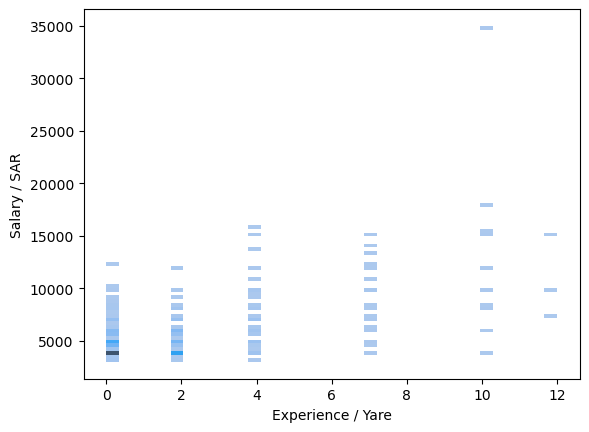

In [727]:
sns.histplot(data=df, 
            x="Experience / Yare",
             y = "Salary / SAR",
            )

<Axes: xlabel='Experience / Yare', ylabel='Salary / SAR'>

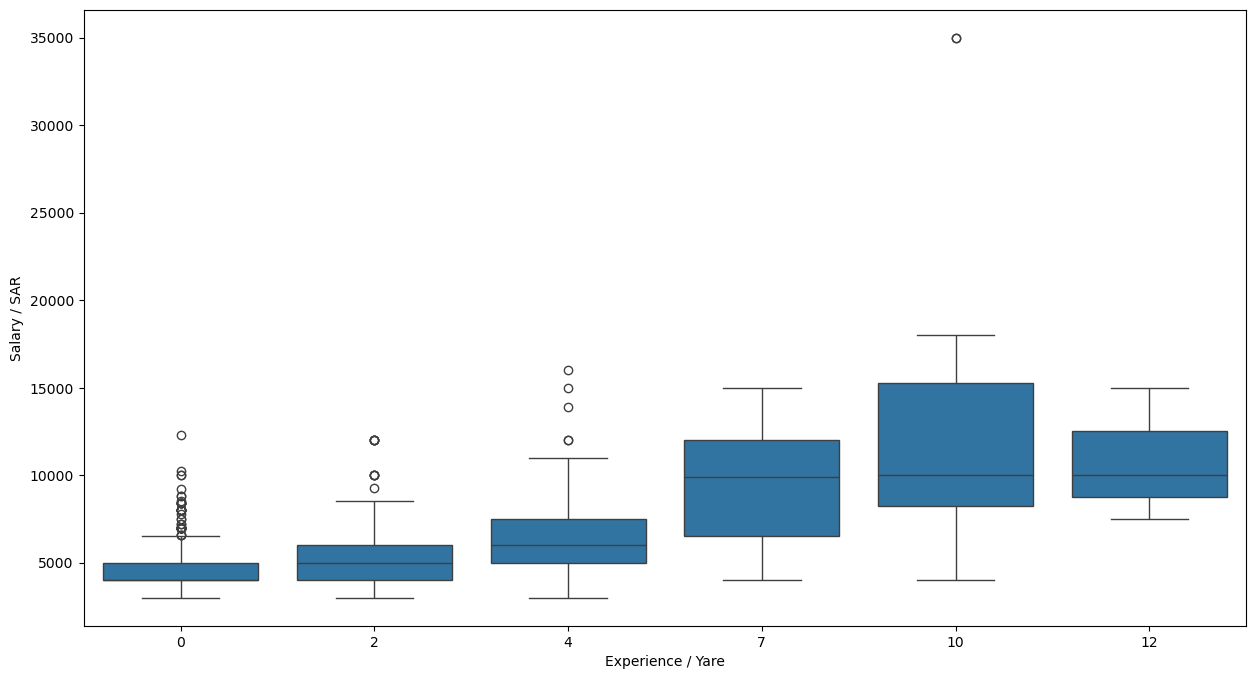

In [729]:
plt.figure(figsize=(15,8))
t10 = df.head(10)
sns.boxplot(
    df,
    x="Experience / Yare",
             y = "Salary / SAR",
    #z="Company Size"
)

## Data visualization

In [732]:
df.columns


Index(['Job Title', 'Job Date', 'Job Description', 'Job Tasks', 'Company Name',
       'Company Number', 'Company Type', 'Company Size', 'Economic Activity',
       'Qualification', 'Region', 'City', 'Benefits', 'Contract',
       'Number of vacancies', 'Job ID', 'Experience / Yare', 'Gender',
       'Salary / SAR'],
      dtype='object')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22708\3031155356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'] = df['Region'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22708\3031155356.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frequency_counts, x='Region', y='Count', palette='Set2')


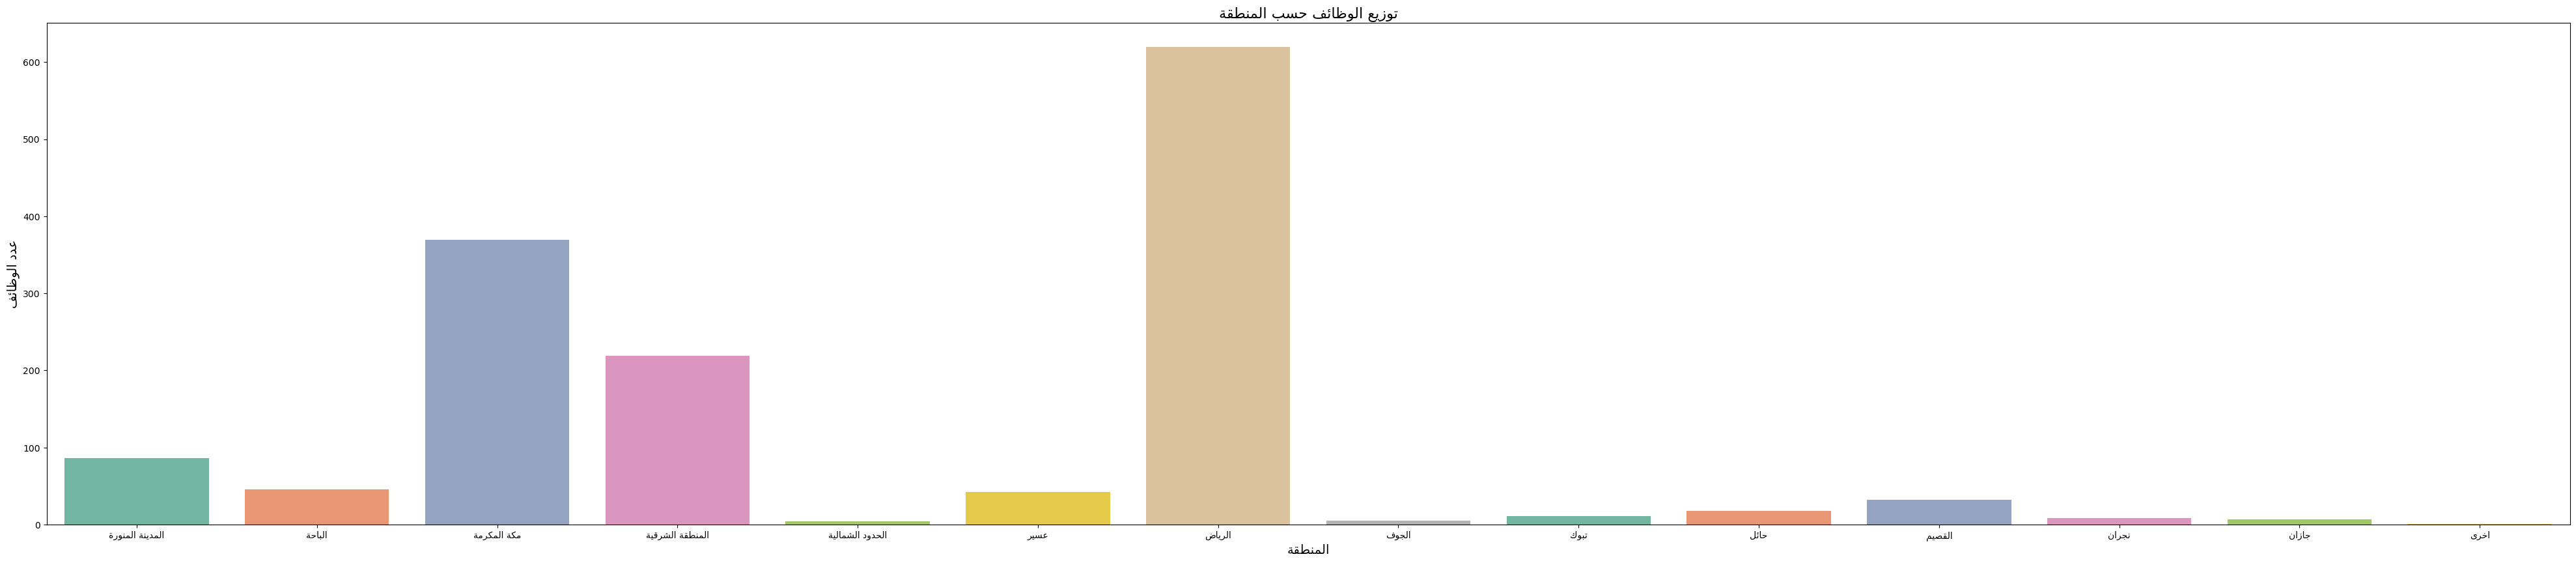

In [778]:
import arabic_reshaper
from bidi.algorithm import get_display
df['Region'] = df['Region'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

frequency_counts = df.groupby(['Region']).size().reset_index(name='Count')
title = "توزيع الوظائف حسب المنطقة"
xlabel = "المنطقة"
ylabel = "عدد الوظائف"

reshap_title = arabic_reshaper.reshape(title)
bidi_title = get_display(reshap_title)
reshap_xlabel = arabic_reshaper.reshape(xlabel)
bidi_xlabel = get_display(reshap_xlabel)
reshap_ylabel = arabic_reshaper.reshape(ylabel)
bidi_ylabel = get_display(reshap_ylabel)

plt.figure(figsize=(50, 10))
sns.barplot(data=frequency_counts, x='Region', y='Count', palette='Set2')

plt.title(bidi_title, fontsize=16)
plt.xlabel(bidi_xlabel, fontsize=14)
plt.ylabel(bidi_ylabel, fontsize=14)



plt.show()

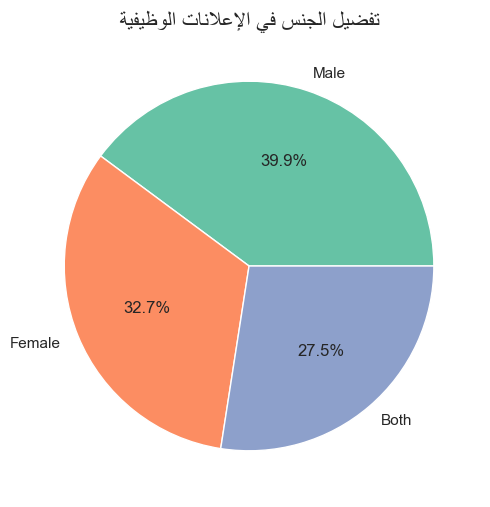

In [784]:
frequency_counts = df['Gender'].value_counts().reset_index()
frequency_counts.columns = ['Gender', 'Count']

sns.set(style="whitegrid")

# Titles and labels in Arabic
title = "تفضيل الجنس في الإعلانات الوظيفية"
labels = ['Male', 'Female', 'Both']


reshaped_title = arabic_reshaper.reshape(title)
bidi_title = get_display(reshaped_title)

plt.figure(figsize=(6, 6))
plt.pie(frequency_counts['Count'], labels=labels, autopct='%1.1f%%', colors=sns.color_palette("Set2", n_colors=len(labels)))
plt.title(bidi_title, fontsize=16)
plt.show()

In [790]:
min_salary = df['Salary / SAR'].min()
max_salary = df['Salary / SAR'].max()
average_salary = df['Salary / SAR'].mean()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22708\2527604332.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Statistic', y='Salary', data=salary_summary, palette='Set2')


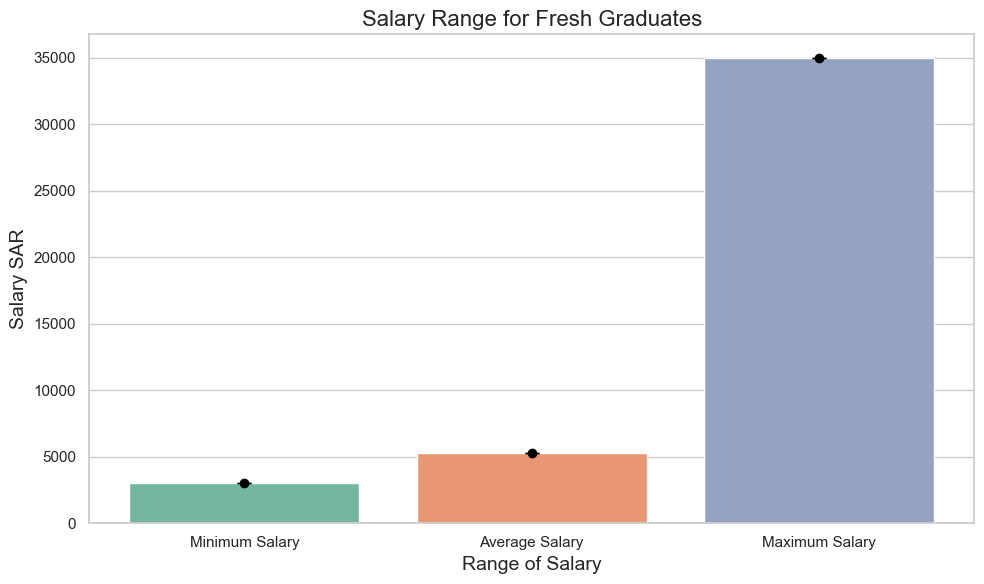

In [794]:
sns.set(style="whitegrid")
salary_summary = pd.DataFrame({
    'Statistic': ['Minimum Salary', 'Average Salary', 'Maximum Salary'],
    'Salary': [min_salary, average_salary, max_salary]
})
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Statistic', y='Salary', data=salary_summary, palette='Set2')
bar_plot.errorbar(x=['Minimum Salary', 'Average Salary', 'Maximum Salary'], 
                  y=[min_salary, average_salary, max_salary], 
                  yerr=[0, 0, 0],  
                  fmt='o', 
                  color='black', 
                  capsize=5)
plt.title('Salary Range for Fresh Graduates', fontsize=16)
plt.xlabel('Range of Salary', fontsize=14)
plt.ylabel('Salary SAR', fontsize=14)

plt.tight_layout()
plt.show()

In [806]:
fresh_graduates = df[df['Experience / Yare'] == 0 ]
experienced_people = df[df['Experience / Yare'] > 0]


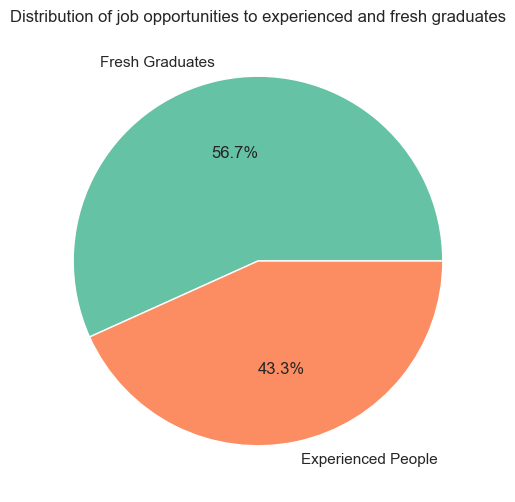

In [810]:
number_fresh_graduates = len(fresh_graduates)
number_experienced_people = len(experienced_people)
total_postings = number_experienced_people + number_fresh_graduates
percent_fresh_graduates = (number_fresh_graduates / total_postings) * 100
percent_experienced_people = (number_experienced_people / total_postings) * 100
distribution_data = pd.DataFrame({
    'Category': ['Fresh Graduates', 'Experienced People'],
    'Percentage': [percent_fresh_graduates, percent_experienced_people]
})

sns.set(style="whitegrid")

title = "Distribution of job opportunities to experienced and fresh graduates"


plt.figure(figsize=(6, 6))
plt.pie(distribution_data['Percentage'], labels=distribution_data['Category'], autopct='%1.1f%%', colors=sns.color_palette("Set2", n_colors=2))
plt.title(title)
plt.show()

## Additional Question

In [812]:
df['month'] = df['Job Date'].dt.to_period('M')
monthly_frequency = df.groupby('month').size().reset_index(name='Count')
monthly_frequency['month'] = monthly_frequency['month'].dt.to_timestamp()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22708\2618133704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Job Date'].dt.to_period('M')


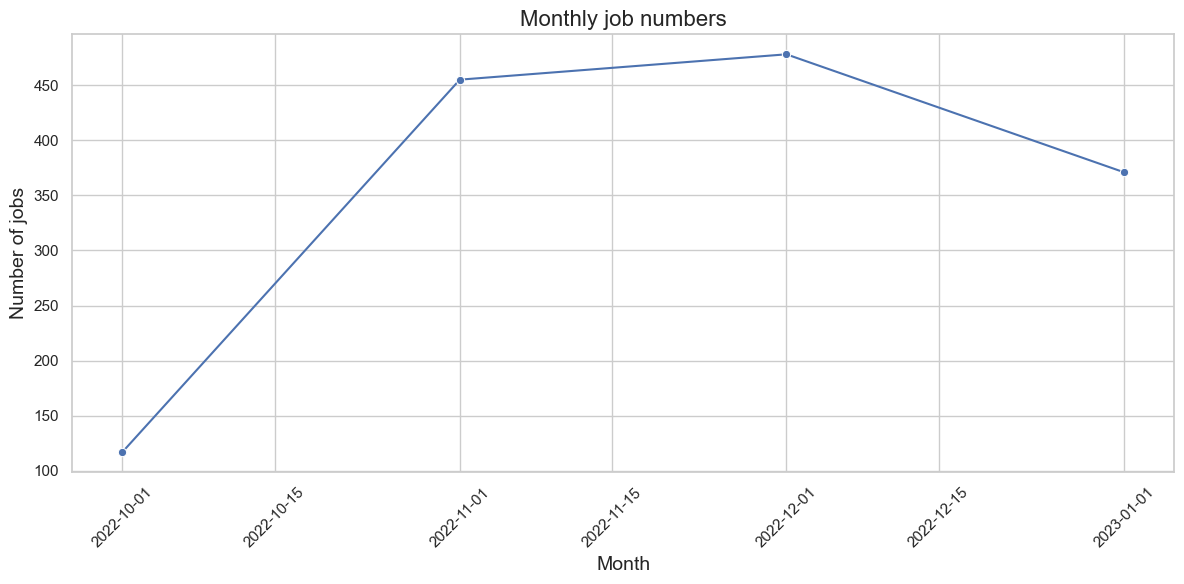

In [834]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Count', data=monthly_frequency, marker='o')
plt.title('Monthly job numbers', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of jobs', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

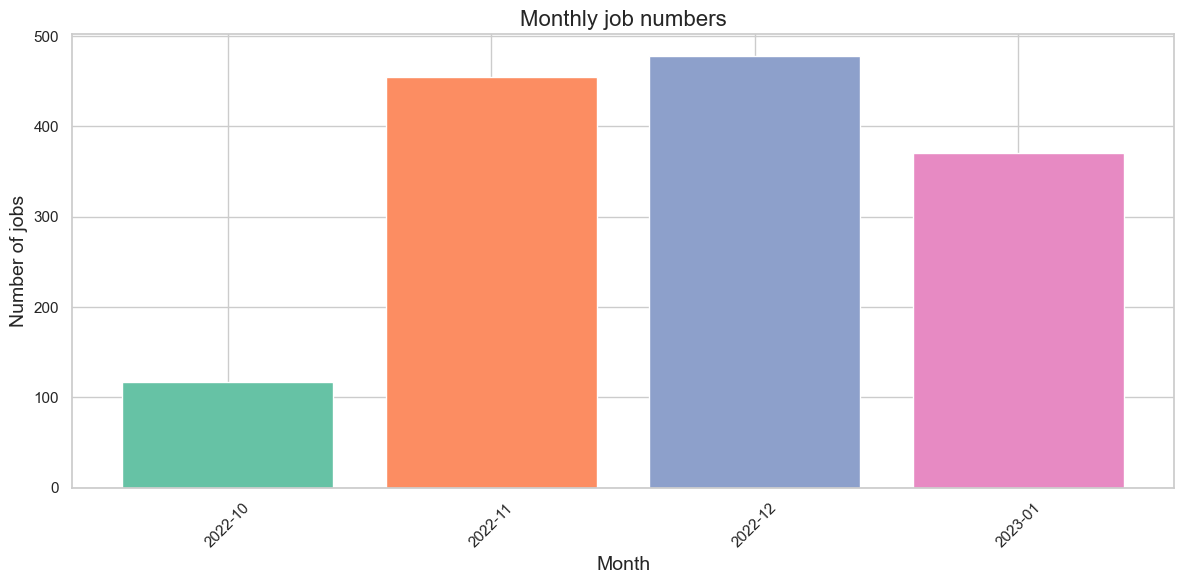

In [836]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_frequency['month'].dt.to_period('M').astype(str), monthly_frequency['Count'], color=sns.color_palette("Set2", n_colors=len(monthly_frequency)))

# Add titles and labels
plt.title('Monthly job numbers', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of jobs', fontsize=14)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()